### Does big data approach work for all 3 of Gap brands: 
* **Old Navy**
* **GAP**
* **Banana Republic** 

#### Why or why not? Which brands are better/worse served by this strategy?

#### Collect web data for all 3 different brands and do in-depth analysis to support your answer. 

In [2]:
#import libraries
# from bs4 import BeautifulSoup as bs
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
# # from selenium.webdriver.firefox.options import Options
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.wait import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.keys import Keys
# # from selenium.webdriver.firefox.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# # from webdriver_manager.firefox import GeckoDriverManager
# import time
# import random
# import pandas as pd 
# pd.options.mode.chained_assignment = None


### GAP Brands Data

In [3]:
#import libraries
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import time
import random
#scrape Amazon urls for GAP, Old Navy, and Banana Republic sales data 

def amazon_scrape(urls):
    chrome_options = Options()
    #chrome_options.add_argument('--headless') #uncomment if you want browser to run in background, not even see browser open  
    chrome_options.add_argument('--nosandbox') #lets it operate at the highest authority, give more power
    chrome_options.add_argument('--disable-dev-shm-usage') #increase the RAM of chrome to load the page

    # Only one browser will open and stay open until the code is done running.
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options = chrome_options)
    product_details = []

    for url in urls: 
        # Open the Amazon page
        driver.get(url)
        time.sleep(5)  # Wait for page to load (You can replace this with WebDriverWait for better synchronization)

        # Extract product details

        html = driver.page_source # Get the html of the page

        #then use typical beautifulsoup to get content
        soup = bs(html, 'html.parser') 

        #product sections 
        product_section = soup.find('div', {'id':'search'})

        #each product is contained in a 'div' with class 's-result-item'
        products = product_section.find_all('div', class_='s-result-item')

        for product in products:
            try:
                name = product.find('span',class_='a-size-base-plus a-color-base a-text-normal').text.strip()
            except:
                name = 'N/A'
            try:
                rating = float(product.find('span', class_='a-icon-alt').text.split()[0])
            except:
                rating = 0.0
            try:
                reviews = int(product.find('span', class_='a-size-base s-underline-text').text.replace(',', '').strip())
            except:
                reviews = 0

            product_details.append({
                'name': name,
                'rating': rating,
                'number of reviews': reviews
            })

    driver.quit()
    return product_details

In [4]:
#gap 20 pages
gap_pages = 20
gap_urls = []

for i in range(0, gap_pages):
    if i == 0:
        gap_urls.append('https://www.amazon.com/s?k=gap&rh=n%3A7141123011%2Cp_123%3A750818&dc&ds=v1%3Afgd1vKTGa2fd6TGiufcs2x%2BeDvSHM0VxzHcqeGYYbzM&crid=3USM0NFD7W76N&qid=1712826958&rnid=85457740011&sprefix=gap%2Caps%2C270&ref=sr_nr_p_123_1')
    else:
        gap_urls.append('https://www.amazon.com/s?k=gap&i=fashion&rh=n%3A7141123011%2Cp_123%3A750818&dc&page=' + str(i+1) + '&crid=3USM0NFD7W76N&qid=171282*&rnid=85457740011&sprefix=gap%2Caps%2C270&ref=sr_pg_' + str(i+1))
#oldnavy_pages = 1
oldnavy_url = 'https://www.amazon.com/s?k=old+navy&i=fashion&rh=n%3A7141123011%2Cp_123%3A38802&dc&ds=v1%3Ah1UUdw84es2KOYpohuYDthcXM9jKpo5VtOsqUkiFT4E&crid=2UK7JM76AMCAF&qid=1712828277&rnid=85457740011&sprefix=old+navy%2Cfashion%2C288&ref=sr_nr_p_123_6'

brep_pages = 4 #banana republic pages 4
brep_urls = []
for i in range(0,brep_pages):
    if i == 0:
        brep_urls.append('https://www.amazon.com/s?k=banana+republic&rh=n%3A7141123011%2Cp_123%3A38801&dc&ds=v1%3A9s21Nox8B0Ck1GzCE5nNnqGpyLpgRAoIQ7%2BVUkST37o&crid=2CNC2O1OFDYIN&qid=1712828639&rnid=85457740011&sprefix=banana+republ%2Caps%2C286&ref=sr_nr_p_123_2')
    else:
        brep_urls.append('https://www.amazon.com/s?k=banana+republic&i=fashion&rh=n%3A7141123011%2Cp_123%3A38801&dc&page=' + str(i+1) + '&crid=2CNC2O1OFDYIN&qid=171282*&rnid=85457740011&sprefix=banana+republ%2Caps%2C286&ref=sr_pg_'+str(i+1))
        
all_urls = gap_urls + [oldnavy_url] + brep_urls
print(len(all_urls))

25


In [5]:
data = amazon_scrape(all_urls)

In [53]:
# print(len(data))

In [67]:
import csv
#save to csv
products = 'all_products.csv'
fields = ['name', 'rating', 'number of reviews']

with open(products, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames= fields)
    writer.writeheader()
    for product in data:
        writer.writerow(product)
df = pd.DataFrame(data = data)
df = df[df['name']!='N/A']
# print(df)
df.to_csv(products, index=False, encoding='utf-8')
print(f'product details saved on {products}')

product details saved on all_products.csv


In [7]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basque_gra

True

In [8]:
nltk.download('stopwords')
stopwords.words('english')
import string
# stopwords_list = stopwords.words('english')+list(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
#Counter subclass of dict class, designed for counting hashable objects
from collections import Counter
import re

#convert products into one string
product_names = ''.join(df['name'].str.lower())

# Define a list of words and phrases to exclude
exclude_words = set(['boys', 'girls', 'men', "'s", 'women','demo', '100'])

#tokenize product names like in NLTK lecture
tokens = word_tokenize(product_names)

#remove stop words from names_tokenized
stop_words = set(stopwords.words('english'))
words_to_keep = [word for word in tokens if word not in stop_words 
                                             and len(word) > 1 
                                             and word not in exclude_words]

# print(words_to_keep)

#Count occurrences for products
word_counts = Counter(words_to_keep)

# Get the top most occurring words 
top_words = dict(word_counts.most_common(20))

print(top_words)

{'sleeve': 248, 'long': 163, 'logo': 138, 'short': 101, 'tee': 97, '3-pack': 73, 'fit': 67, 'eyeglasses': 64, 'crew': 54, 'lens': 54, '2-pack': 49, 'black': 49, 'polo': 43, 'fleece': 40, 'denim': 40, 'ribbed': 38, 't-shirtwomen': 37, 'graphic': 37, 'pull-on': 37, 'cotton': 37}


### Amazon Best Sellers Data

In [30]:
#Amazon Bestseller lists for comparison
amz_pages = 2
amzn_urls = []
for i in range(0,amz_pages):
    if i == 0:
        amzn_urls.append('https://www.amazon.com/Best-Sellers-Clothing-Shoes-Jewelry/zgbs/fashion/ref=zg_bs_pg_1_fashion?_encoding=UTF8&pg=1')
    else:
        amzn_urls.append('https://www.amazon.com/Best-Sellers-Clothing-Shoes-Jewelry/zgbs/fashion/ref=zg_bs_pg_'+ str(i+1) +'_fashion?_encoding=UTF8&pg='+str(i+1))
# print(amzn_urls)

In [40]:
def best_sellers(urls):
    chrome_options = Options()
    #chrome_options.add_argument('--headless') #uncomment if you want browser to run in background, not even see browser open  
    chrome_options.add_argument('--nosandbox') #lets it operate at the highest authority, give more power
    chrome_options.add_argument('--disable-dev-shm-usage') #increase the RAM of chrome to load the page

    # Only one browser will open and stay open until the code is done running.
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options = chrome_options)
    product_details = []

    for url in urls: 
        # Open the Amazon page
        driver.get(url)
        time.sleep(5)  # Wait for page to load (You can replace this with WebDriverWait for better synchronization)

        # Extract product details

        html = driver.page_source # Get the html of the page

        #then use typical beautifulsoup to get content
        soup = bs(html, 'html.parser') 

        #product sectios 
        product_section = soup.find('div', {'id':'zg'})

        #each product is contained in a 'div' with id 'gridItemRoot'
        products = product_section.find_all('div', {'id':'gridItemRoot'})

        for product in products:
            try:
                name = product.find('div',class_='_cDEzb_p13n-sc-css-line-clamp-3_g3dy1').text.strip()
            except:
                name = 'N/A'
            try:
                rating = float(product.find('span', class_='a-icon-alt').text.split()[0])
            except:
                rating = 0.0
            try:
                reviews = int(product.find('span', class_='a-size-small').text.replace(',', '').strip())
            except:
                reviews = 0

            product_details.append({
                'name': name,
                'rating': rating,
                'number of reviews': reviews
            })

    driver.quit()
    return product_details

In [41]:
best_sellers_data = best_sellers(amzn_urls)


In [44]:
# print(len(best_sellers_data))

In [43]:
import csv
#save to csv
best_seller_products = 'best_sellers.csv'
fields = ['name', 'rating', 'number of reviews']

with open(best_seller_products, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames= fields)
    writer.writeheader()
    for product in best_sellers_data:
        writer.writerow(product)
        
print(f'product details saved on {products}')

product details saved on all_products.csv


In [155]:
# Repeat process to identify top words in Amazon Best Sellers
bs_df = pd.DataFrame(data = best_sellers_data)

#convert products into one string
bs_names = ''.join(bs_df['name'].str.lower())

# Define a list of words and phrases to exclude
bsexclude_words = set(['boys', 'girls', 'men', "'s", 'women' , 'womens', '100', 'available', 'size'])

#remove stop words from names_tokenized
bsstop_words = set(stopwords.words('english'))

#tokenize product names like in NLTK lecture
bs_tokens = word_tokenize(bs_names)
# print(bs_tokens)

bswords_to_keep = [word for word in bs_tokens if word not in bsstop_words 
                                             and len(word) > 2 
                                             and word not in bsexclude_words]

# print(bswords_to_keep)

#Count occurrences for products
bs_word_counts = Counter(bswords_to_keep)

# # Get the top most occurring words 
bs_top_words = dict(bs_word_counts.most_common(20))

#print(bs_top_words)

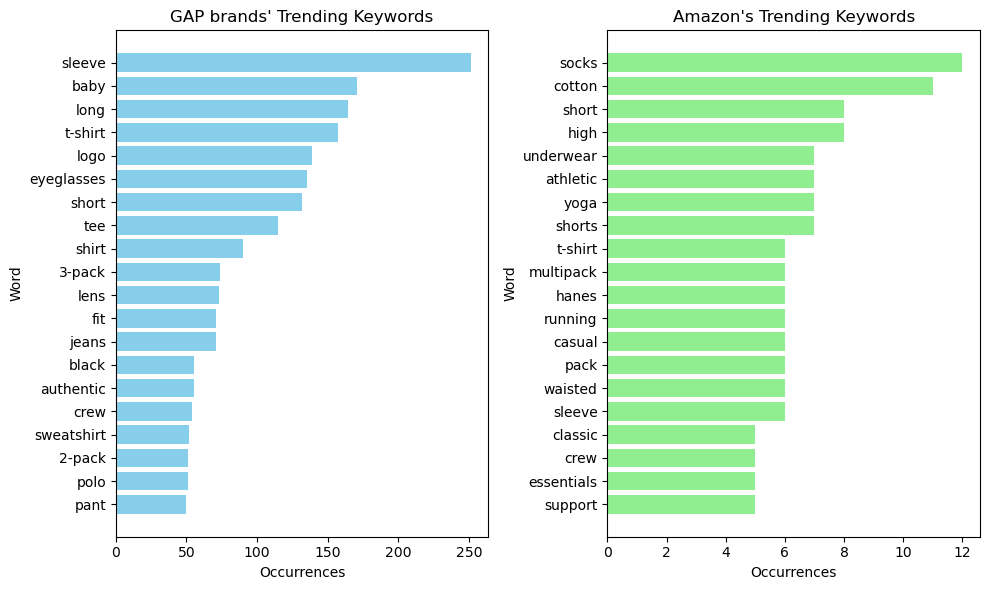

In [156]:
plt.figure(figsize=(10, 6))

#GAP brands data best sellers on Amazon
plt.subplot(1,2,1)
plt.barh(df_top_keywords['Keyword'], df_top_keywords['Occurrences'], color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Word')
plt.title("GAP brands' Trending Keywords")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top, gca method 'gets current axes'

#Overall Amazon best sellers  data
plt.subplot(1,2,2)
plt.barh(bs_top_keywords['Keyword'], bs_top_keywords['Occurrences'], color='lightgreen')
plt.xlabel('Occurrences')
plt.ylabel('Word')
plt.title("Amazon's Trending Keywords")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top, gca method 'gets current axes'

plt.tight_layout()
plt.show()

### Regression analysis on features and number of reviews to gauge effect on ratings

In [157]:
#consolidate all top words for regression analysis

all_top = bswords_to_keep + words_to_keep
all_word_counts = Counter(all_top)

all_top_list = list(all_word_counts.most_common(100))
all_top_words = [word for word, count in all_top_list]  # Extract words from the list of tuples

#merge product files to pull from one file 
gap_products = pd.read_csv('all_products.csv')
amzn_products = pd.read_csv('best_sellers.csv')
merged_products = pd.concat([gap_products,amzn_products])
merged_products.reset_index(drop=True, inplace=True)

merged_products.to_csv('merged_products.csv',index=False, encoding='utf-8')


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

#load merged data
merged_products = pd.read_csv('merged_products.csv')

#dummy variable for top keywords
for keyword in all_top_words:
    merged_products[keyword] = merged_products['name'].str.contains(keyword).astype(int)

all_top_words_no_numbers = [word for word in all_top_words if not any(char.isdigit() for char in word) and len(word) > 2 ]

merged_products['lrating'] = np.log(1+ merged_products['rating'])
merged_products['lnumberofreviews']=np.log(1+ merged_products['number of reviews'])


#variables 
X = merged_products[['lnumberofreviews'] + all_top_words]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = merged_products['rating']
#run model
model = sm.OLS(y, X).fit()
# print(model.summary())

#extract signficant coefficients on a 90% confidence interval
sig_coeffs = model.params[model.pvalues <=0.10]
print(sig_coeffs)

const               2.020318e+00
lnumberofreviews    4.450920e-01
3-pack              1.527098e+00
lens                2.020842e-15
high               -2.937147e+00
00                 -1.766311e+00
cat                -2.516103e+00
one                -2.054499e+00
tech               -2.730154e+00
dtype: float64


C:\Users\V\AppData\Local\Temp\ipykernel_17332\529987172.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_products[keyword] = merged_products['name'].str.contains(keyword).astype(int)
C:\Users\V\AppData\Local\Temp\ipykernel_17332\529987172.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_products[keyword] = merged_products['name'].str.contains(keyword).astype(int)
C:\Users\V\AppData\Local\Temp\ipykernel_17332\529987172.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 